# Naive Bayes

Notes from "Machine Learning A-Z", Kirill Eremenko - Udemy.

### Example: Two machines producing the same product, which might be defective

We have two machines M1 & M2 that produce spanners mixed in a common bin; they both produce some defective spanners sometimes. We know the following:
- M1 produces 30 panners/h
- M2 produces 20 panners/h
- We can see that 1% of spanners are defective
- From all defective parts 50% are from M1, 50% from M2

Note that frequencies or total amount can be used to compute probablities.

What's the probability of machine 2 to produce a defective spanner? That's given by the Bayes' Theorem:

$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$
- P(A): Prior probability
- P(B): Marginal likelihood
- P(B|A): Likelihood
- P(A|B): Posterior probability

We can compute (from known items above):
- P(M1) = 30 / (30 + 20) = 0.6
- P(M2) = 20 / (30 + 20) = 0.4
- P(Defect) = 0.01
- P(M1|Defect) = 0.5; P(M2|Defect) = 0.5

P(Defect|M2)?

P(Defect|M2) = P(M2|Defect) * P(Defect) / P(M2) = 0.5 * 0.01 / 0.4 = 0.0125 = 1.25%

P(Defect|M1) = P(M1|Defect) * P(Defect) / P(M1) = 0.5 * 0.01 / 0.6 = 0.0083 = 0.83%

### Naive Bayes: Intuition

Example dataset:
- Data point features (Age, Salary) = (A,S)
- Target classes: Walks to work, Drives to work = W | D
    - W: 10 samples, D: 20 samples, W+D: 30 samples in total
- Given a new point X=(A,S), we want to determine its class W | D

We want to know: P(W|X)? P(D|X)? -> P(W|X) = P(X|W) * P(W) / P(X)
- P(W): all W samples / all samples = 10 / 30
- P(X)? This is the probability of having a new sample X fall in a small circle with radius R we define in the region it is, i.e., the probability of having a similar point to th eones within the circle. Thus, we draw a circle and
    - P(X) = samples within cicle / all samples = 4 / 30 
- P(X|W)? Which is the probability that a random point from the region of class W falls into the circle of X?
    - P(X|W) = number of samples of class W in cicler / all W samples = 3 / 10
- **Therefore**: P(W|X) = (3/10) * (10/30) / (4/30) = 0.75
- Similarly: P(D|X) = 0.25

### Naive Bayes: Comments

The Bayes Theorem requires the underlying features of X to be independent, which often times is not met; therefore, we call it *naive* bayes. In the case of Age & Salary, we see there is some sort of correlation between them.

Comments about P(X) (P(B)):
- It can be understood as the probability of an X ball of falling in our ROI; in 1D it's the area under the distribution curve of our dataset.
- When we compare P(W|X) and P(D|X), both have P(X) in the denominator, that means we can actually drop P(X) and compare the nominators! If we want to compute the values of P(W|X) and P(D|X), we need P(X), but if we want to compare them, we don't need it.

The sum of the probabilities of all classes is 1:

sum(P(C1|X),P(C2|X),P(C3|X),...) = 1 --> P(W|X) + P(D|X) = 1



### Example

Dataset of 400 customers. Each one as 2 features: age and estimated salary. The target is whether they bought an SUV or not. The classifier should predict whether a customer would buy an SUV or not in odrder to show him the ad.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [34]:
# Load and explore dataset
# Dataset of 400 customers.
# Each one as 2 features: age and estimated salary.
# The target is whether they bought an SUV or not.
# The classifier should predict whether a customer would buy an SUV or not in odrder to show him/her the ad.
df = pd.read_csv('data/Social_Network_Ads.csv')

In [35]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [37]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


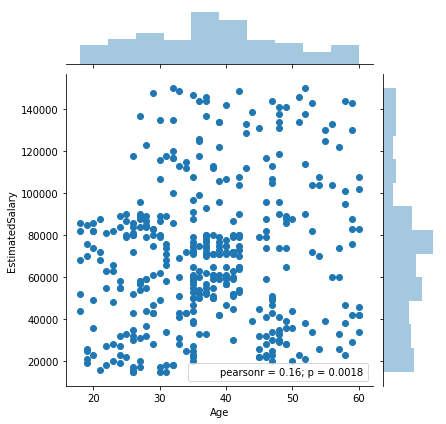

In [38]:
# Plot the samples with 2 features in 2D
sns.jointplot(x='Age',y='EstimatedSalary',data=df)

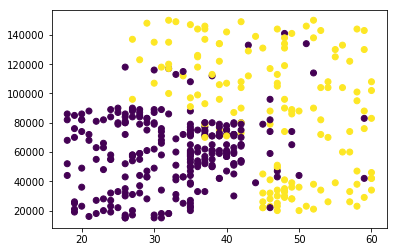

In [39]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [40]:
# Crate the train/test splits
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Scale data!
# The scaling range should be given by the train split only
# The test split should be transformed to that scaling range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Load and instantiate classifier
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

In [45]:
# Fit/Train
bayes.fit(X_train, y_train)

GaussianNB(priors=None)

In [46]:
# Predict/Infer
predictions = bayes.predict(X_test)

In [47]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94        73
          1       0.97      0.83      0.90        47

avg / total       0.93      0.93      0.92       120

[[72  1]
 [ 8 39]]


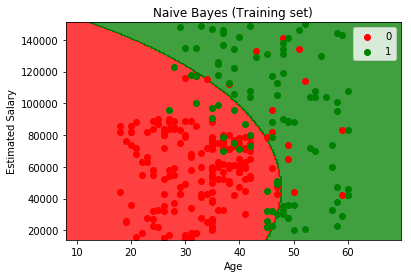

In [49]:
# Visualization: Given any
#     classifier
#     X_train, y_train
#     scaler
#     dataset consisting of samples with 2 features and 2 classes
# we can plot the prediction regions by sampling the feature space in pixels
# and predicting their class with the classifier      
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, bayes.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [50]:
# Very important: since we do Gaussian Naive Bayes,
# we can request the parameters of the underlying Gaussians
# We can use these values later for data augmentation
# Mean of each feature per class
bayes.theta_

array([[-0.42120737, -0.27399035],
       [ 0.80731413,  0.52514817]])

In [51]:
# Variance of each feature per class (diaginal of the covariance matrix)
bayes.sigma_

array([[ 0.63020471,  0.53387341],
       [ 0.71697154,  1.47374316]])